## GROUP 21
- Sai Phani Ram Popuri : **2205577**
- Sandeep Potla : **2151524**
- Sai Suma Podila : **2149229**
- Manivardhan Reddy Pidugu : **2146807**

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.model_selection import RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeRegressor 

from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Read Dataframe

In [2]:
df = pd.read_csv("cali_housing.csv")
data = df

In [3]:
df.shape

(20640, 9)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [5]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [6]:
df.dtypes

MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population       int64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [7]:
df['AveRooms'].value_counts()

5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: AveRooms, Length: 19392, dtype: int64

In [8]:
df['AveOccup'].value_counts()

3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: AveOccup, Length: 18841, dtype: int64

### Null Values Check

<AxesSubplot: >

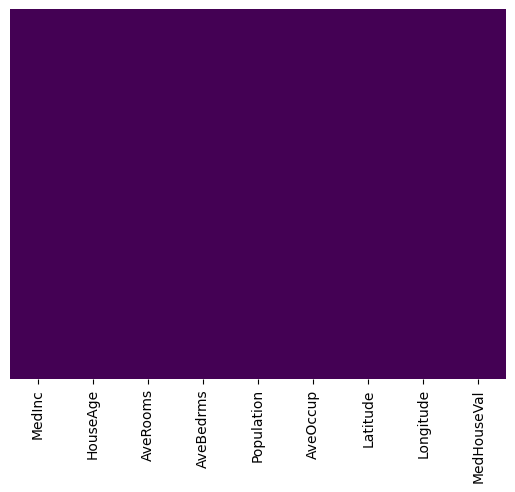

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
df.corr(method = "spearman")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928,0.676778
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752,0.074855
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783,0.263367
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884,-0.125187
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527,0.003839
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468,-0.256594
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203,-0.165739
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000,-0.069667
MedHouseVal,0.676778,0.074855,0.263367,-0.125187,0.003839,-0.256594,-0.165739,-0.069667,1.000000


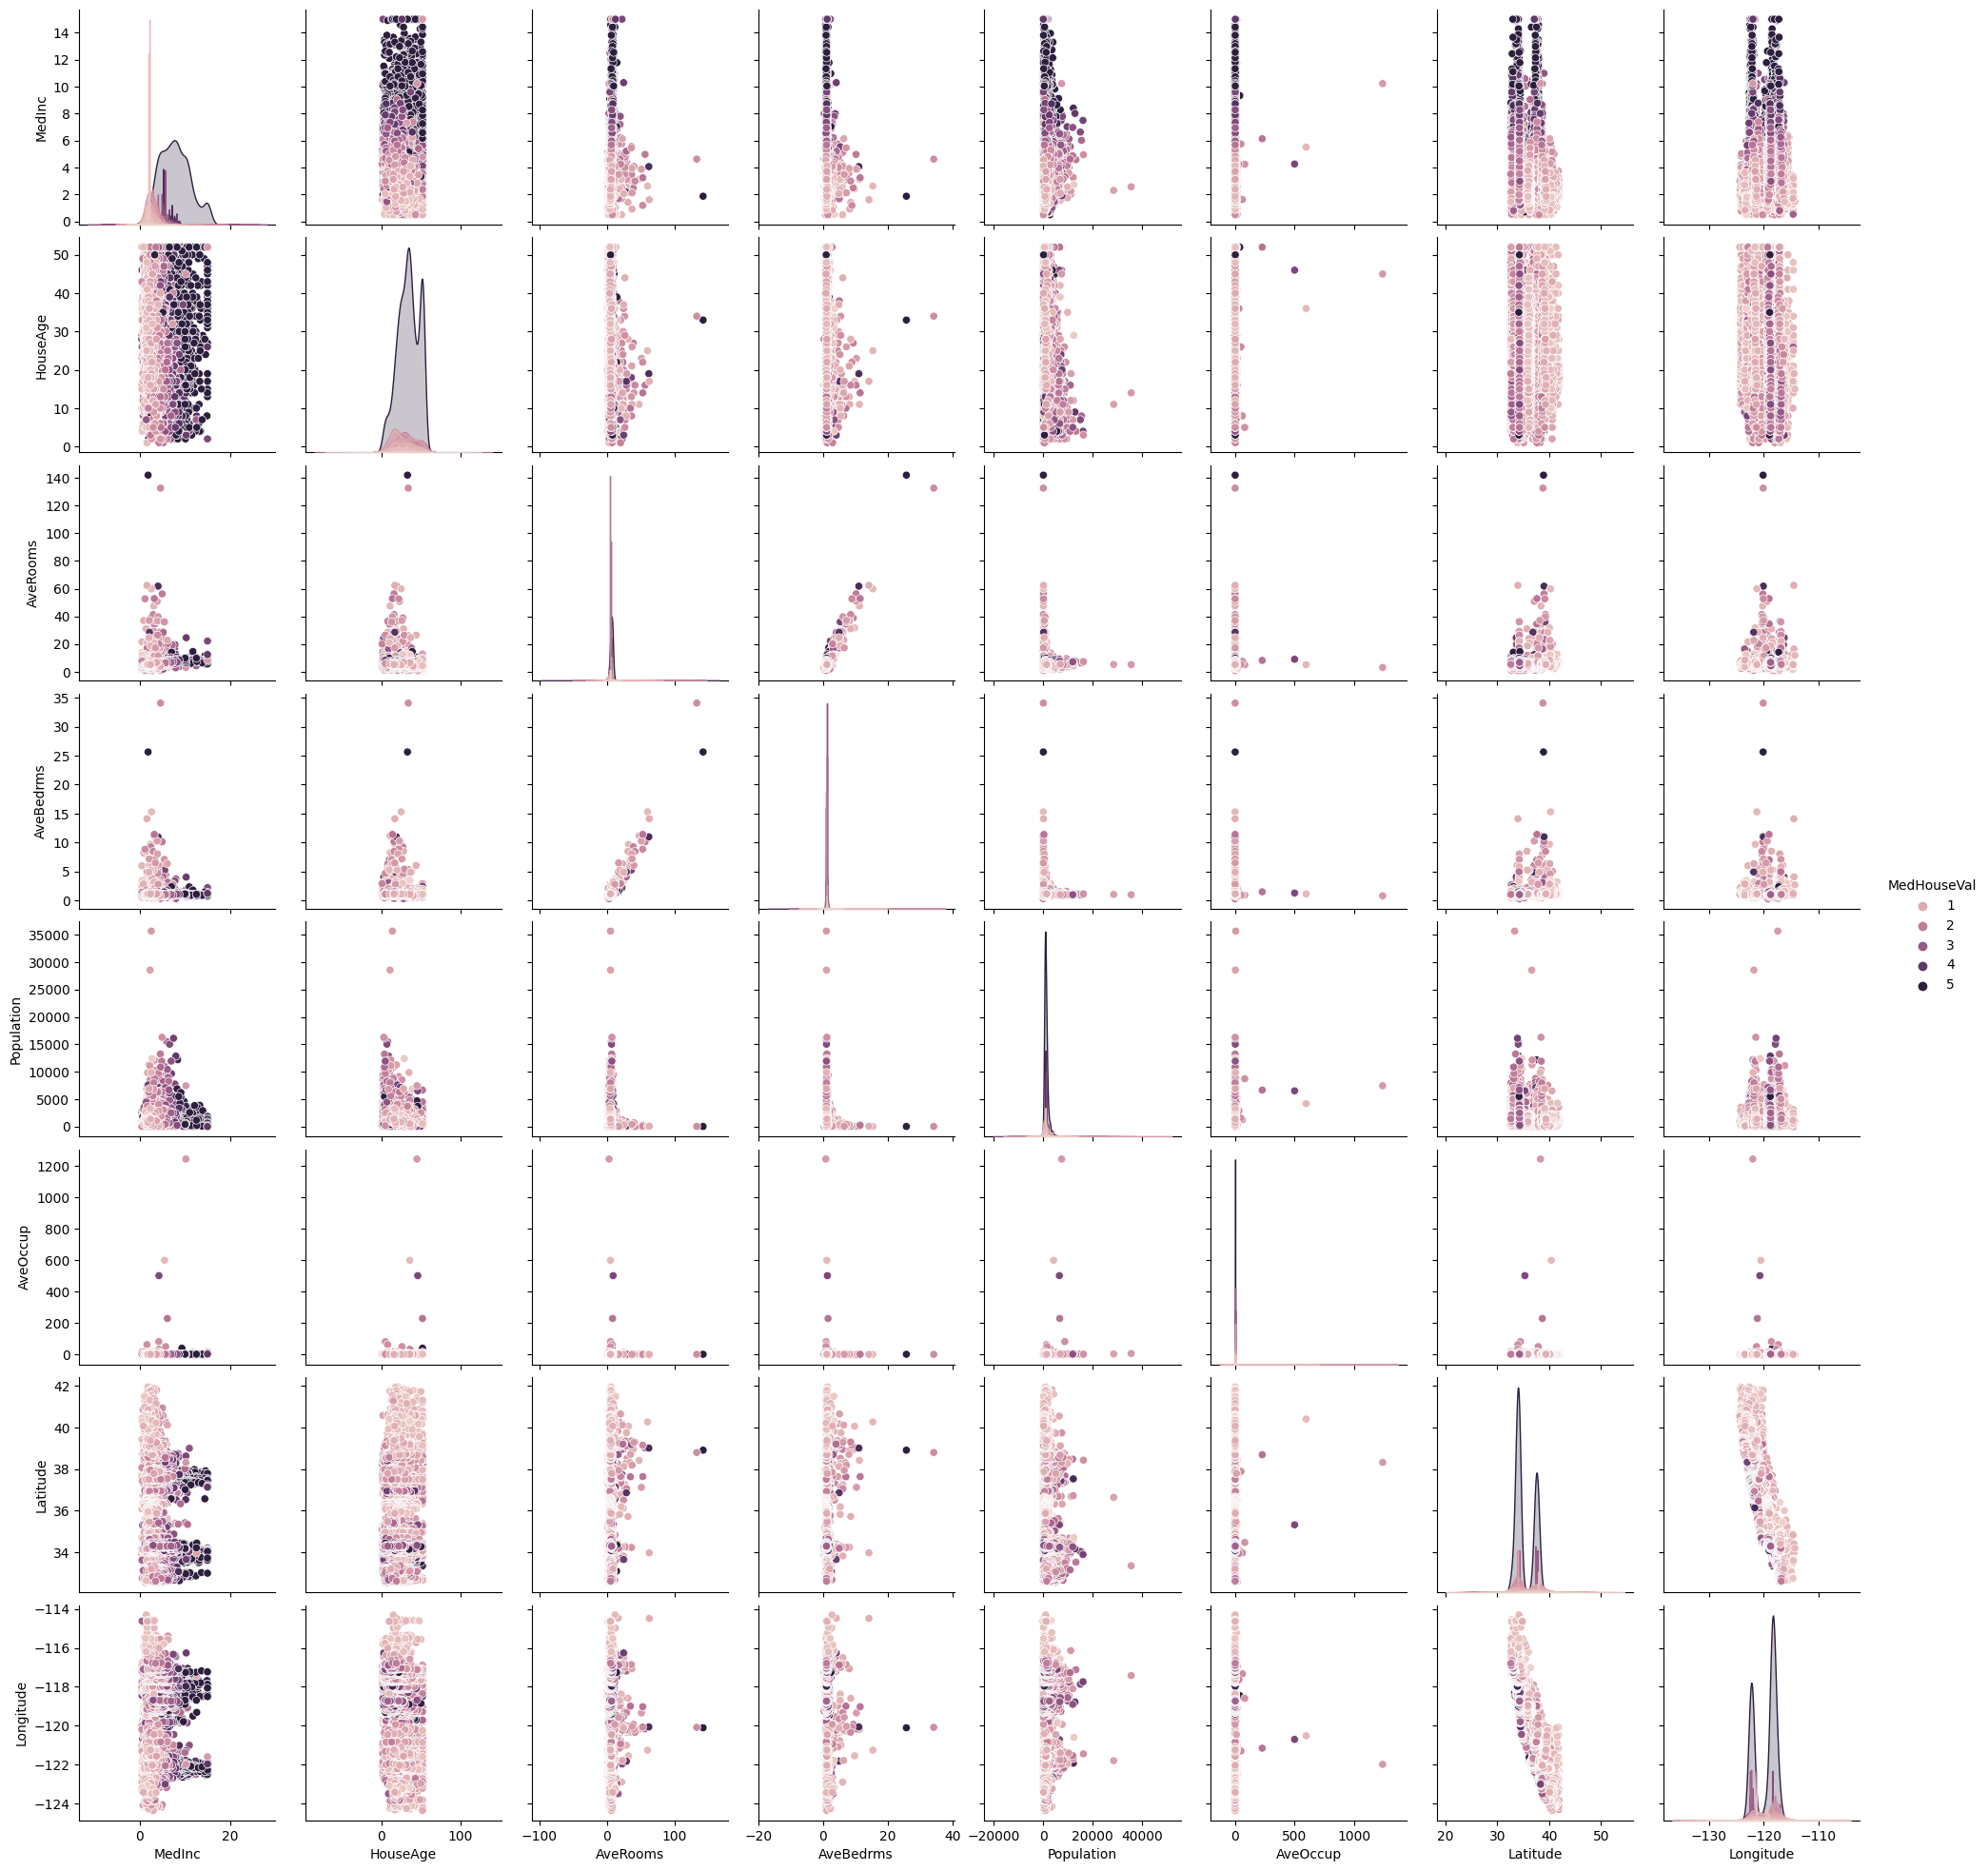

In [11]:
sns.pairplot(data = df, hue = 'MedHouseVal')

**Observations from the above scatter plot**
   - The features 'MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', and 'Latitude' has higher spearman correlation.

<AxesSubplot: >

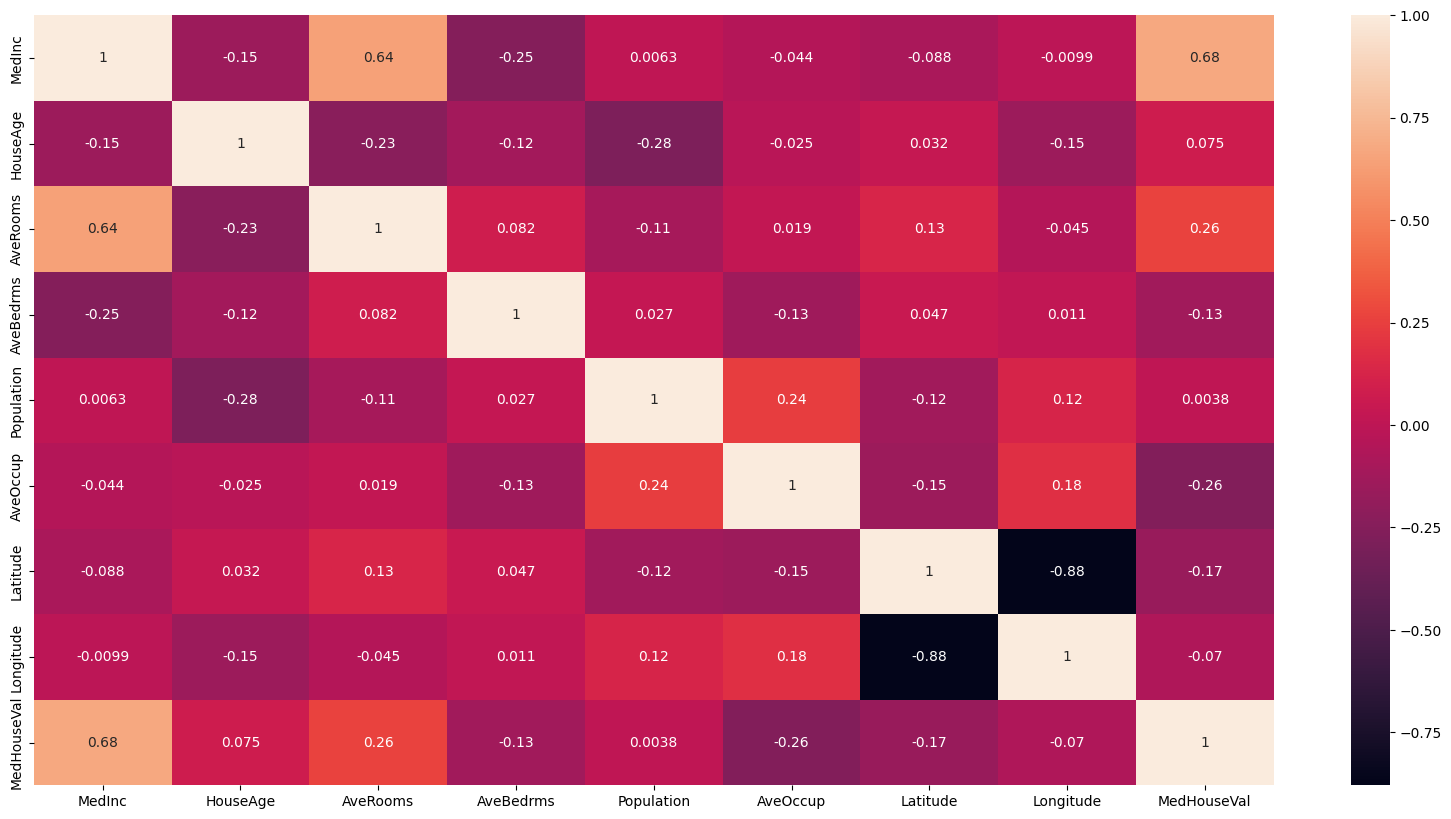

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method = "spearman"), annot=True)

array([[<AxesSubplot: title={'center': 'MedInc'}>,
        <AxesSubplot: title={'center': 'HouseAge'}>,
        <AxesSubplot: title={'center': 'AveRooms'}>],
       [<AxesSubplot: title={'center': 'AveBedrms'}>,
        <AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'AveOccup'}>],
       [<AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'MedHouseVal'}>]], dtype=object)

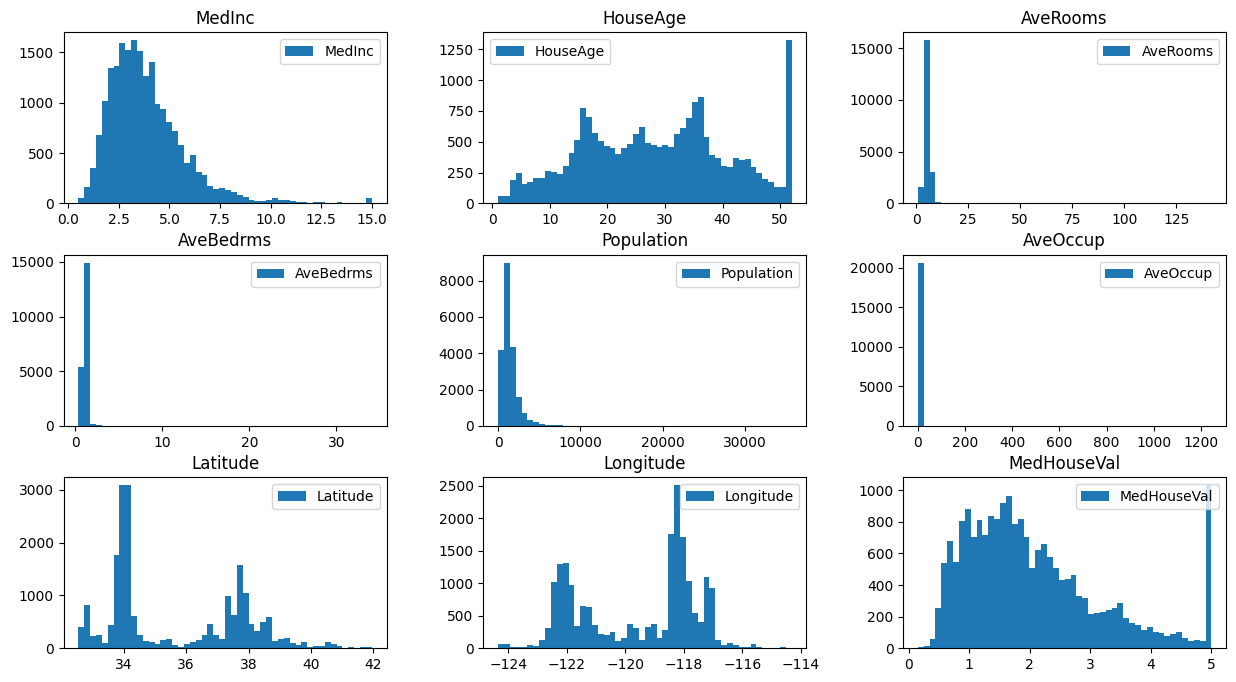

In [13]:
df.hist(legend = True, grid = False, figsize=(15, 8), bins=50)

### Plotting the geographical locations based on Latitude and Longitude values

        - It can be clearly seen that the below scatter plot represents the California state's Map.
        - The green bubbles highlighted in the map represent the areas in the California where the:
            1. Median House Value is very high.
            2. It can be inferred from the map that the housing costs are very high in the Bay-area. 

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

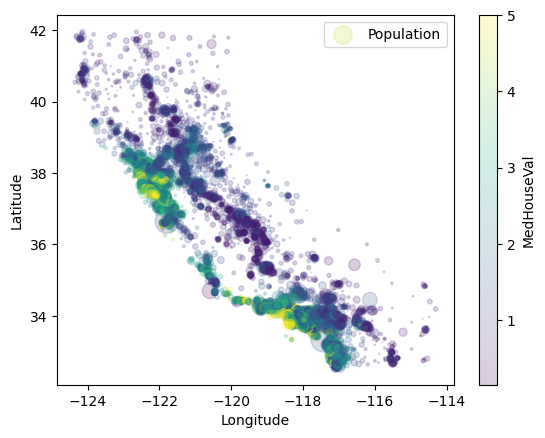

In [14]:
df.plot(kind = "scatter", x = 'Longitude', y = "Latitude", alpha = 0.2,
       s = df["Population"]/100, label="Population",
       c = "MedHouseVal", cmap = plt.get_cmap("viridis"))

### Fetching the Predictor and Target Variables

In [15]:
X = df.iloc[:, 0:8]
y = df.iloc[:, -1]

In [16]:
X, y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252        41  6.984127   1.023810         322  2.555556     37.88   
 1      8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
 2      7.2574        52  8.288136   1.073446         496  2.802260     37.85   
 3      5.6431        52  5.817352   1.073059         558  2.547945     37.85   
 4      3.8462        52  6.281853   1.081081         565  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603        25  5.045455   1.133333         845  2.560606     39.48   
 20636  2.5568        18  6.114035   1.315789         356  3.122807     39.49   
 20637  1.7000        17  5.205543   1.120092        1007  2.325635     39.43   
 20638  1.8672        18  5.329513   1.171920         741  2.123209     39.43   
 20639  2.3886        16  5.254717   1.162264        1387  2.616981     39.37   
 
        Longitude  
 0    

### Train-Test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Scaling the Predictor Variables

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.07762412,  0.11103749, -0.01336164, ..., -0.01092938,
        -0.11824965,  0.30971947],
       [-0.12010957,  1.14378859, -0.05105288, ...,  0.02227903,
        -0.66027094,  0.58432657],
       [-0.41104025,  0.11103749, -0.37464531, ...,  0.01822759,
        -0.87988301,  0.78903368],
       ...,
       [ 1.20235518,  0.9849038 ,  0.29298352, ..., -0.1649567 ,
         1.05457228, -1.33792312],
       [-0.3644009 ,  0.11103749, -0.11836827, ..., -0.07459718,
         0.95644773, -1.24305885],
       [-0.81091876,  0.26992227, -0.80388281, ...,  0.23332922,
        -0.75372289,  0.65921941]])

### Base Variant of Decision Tree

In [20]:
model_1 = DecisionTreeRegressor()

# Fitting the training data to the model
model_1.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [21]:
# Predicting the outcomes 
y_pred = model_1.predict(X_test_scaled)

In [22]:
# Mean Squared Error for test data
print('Mean Squared Error for test data: ', mean_squared_error(y_pred, y_test))

Mean Squared Error for test data:  0.524402509742781


In [23]:
# Feature Importances of the model
'''
1. Higher the value, more is the feature relevance and importance.
2. Need to map the below values with those of the indices from the Predictor variables in 'X'

'''
model_1.feature_importances_

array([0.50977179, 0.0547762 , 0.03233082, 0.03001109, 0.0303688 ,
       0.13998934, 0.10203487, 0.10071709])

In [24]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

**SUMMARY**
    - From the base model, the features with more importance include: 
    
            1. MedInc
            2. Latitude
            3. Longitude
            4. HouseAge
            5. AveRooms

### Decision Tree with GridSearchCV

In [25]:
model_2 = DecisionTreeRegressor()

param_grid = {
                "criterion" : ["squared_error"],
                "splitter" : ["best", "random"],
                "min_samples_split" : range(2, 5, 1),
                "max_features" : ["sqrt", "log2"],
                "max_depth" : range(5, 50, 5),
                "min_samples_leaf" : range(1, 3, 1)
             }

grid_search_res = GridSearchCV(model_2, 
                           param_grid= param_grid, 
                           scoring = "neg_mean_squared_error",
                           cv = 5,
                           verbose = 2,
                           n_jobs = -1,
                           return_train_score=True)

In [26]:
grid_search_res.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(5, 50, 5),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [27]:
# Best set of parameters from the GridSearch CV

grid_search_res.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [28]:
# Lower or Best Negative Mean Square Error Score from our best model
grid_search_res.best_score_

print('Mean Squared Error for Training dataset: ', abs(grid_search_res.best_score_))

Mean Squared Error for Training dataset:  0.4070728869346709


In [29]:
# Predicting the test outcomes
y_pred_1 = grid_search_res.predict(X_test_scaled)

In [30]:
mean_squared_error(y_pred_1, y_test)

print('Mean Squared Error for test dataset: ', mean_squared_error(y_pred_1, y_test))

Mean Squared Error for test dataset:  0.4246600007962726


#### Grid Search CV Results

In [31]:
grid_search_res.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_splitter', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

### Plotting the training errors for all the Grid Search CV models

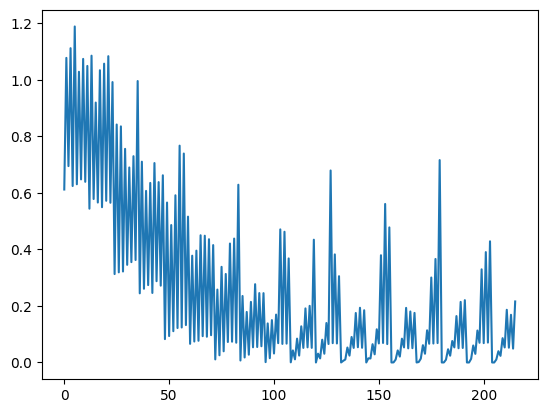

In [32]:
plt.plot(abs(grid_search_res.cv_results_['mean_train_score']))

### Variation of Mean Squared and Mean Absolute Errors with respect to min_sample_split

In [33]:
min_samples = []
mse_errors = []
mae_errors = []

for i in range(2, 40):
    model = DecisionTreeRegressor(criterion='squared_error', min_samples_split=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_errors.append(mean_squared_error(y_test, y_pred))
    
    model = DecisionTreeRegressor(criterion='absolute_error' , min_samples_split=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_errors.append(mean_absolute_error(y_test, y_pred))
    
    
    min_samples.append(i)
        
d = pd.DataFrame({'Min no. of Samples': min_samples,
                  'mse_errors': mse_errors,
                  'mae_errors': mae_errors,
                 })

[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] 

In [34]:
d.head()

,Min no. of Samples,mse_errors,mae_errors
0,2,0.524503,0.454205
1,3,0.506592,0.449818
2,4,0.522867,0.446962
3,5,0.498676,0.442253
4,6,0.481019,0.437681


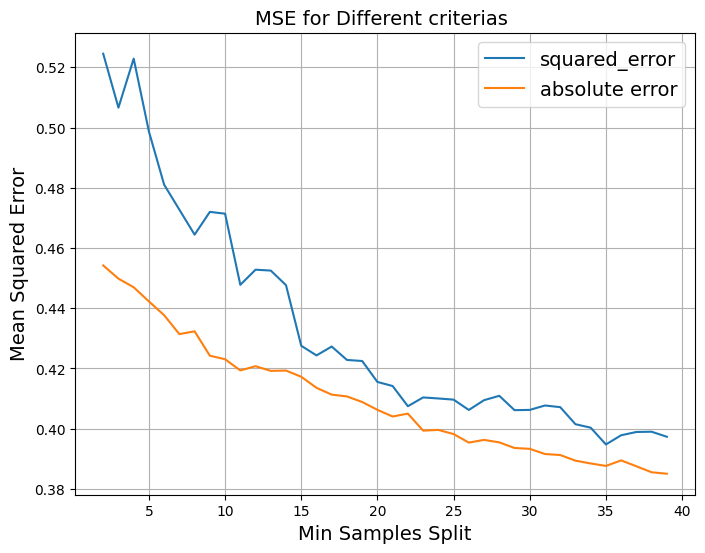

In [35]:
plt.figure(figsize = (8, 6))

plt.plot(d['Min no. of Samples'], d.mse_errors, label='squared_error')
plt.plot(d['Min no. of Samples'], d.mae_errors , label='absolute error')

plt.xlabel('Min Samples Split', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('MSE for Different criterias ', fontsize=14)
plt.grid()
plt.legend(fontsize=14);

### Selecting Features

In [36]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

### Insights from the scatter plot

1. From the scatter plot, it is evident that the relationship between the predictor and target variable are non-linear.
2. The features 'MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', and 'Latitude' has higher spearman correlation.

In [37]:
X_sel = X.iloc[:, [0, 2, 3, 5, 6]]

In [38]:
X_sel

,MedInc,AveRooms,AveBedrms,AveOccup,Latitude
0,8.3252,6.984127,1.023810,2.555556,37.88
1,8.3014,6.238137,0.971880,2.109842,37.86
2,7.2574,8.288136,1.073446,2.802260,37.85
3,5.6431,5.817352,1.073059,2.547945,37.85
4,3.8462,6.281853,1.081081,2.181467,37.85
...,...,...,...,...,...
20635,1.5603,5.045455,1.133333,2.560606,39.48
20636,2.5568,6.114035,1.315789,3.122807,39.49
20637,1.7000,5.205543,1.120092,2.325635,39.43
20638,1.8672,5.329513,1.171920,2.123209,39.43


### Grid search CV + Selected Features

In [39]:
model_3 = DecisionTreeRegressor()

param_grid = {
                "criterion" : ["squared_error"],
                "splitter" : ["best", "random"],
                "min_samples_split" : range(2, 5, 1),
                "max_features" : ["sqrt", "log2"],
                "max_depth" : range(5, 50, 5),
                "min_samples_leaf" : range(1, 3, 1)
             }

ret_model_3 = GridSearchCV(model_3, param_grid= param_grid, 
                               scoring = "neg_mean_squared_error",
                               cv = 5,
                               verbose = 2,
                               n_jobs = -1)

In [40]:
X_trn_sel, X_tst_sel, y_trn_sel, y_tst_sel = train_test_split(X_sel, y, test_size=0.2)

In [42]:
ret_model_3.fit(X_trn_sel, y_trn_sel)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=1, 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(5, 50, 5),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [43]:
ret_model_3.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [45]:
ret_model_3.best_score_
print('Mean Squared Error for Training dataset: ', abs(ret_model_3.best_score_))

Mean Squared Error for Training dataset:  0.5203864816157031


In [46]:
y_pred_3 = ret_model_3.predict(X_tst_sel)

In [47]:
mean_squared_error(y_pred_3, y_tst_sel)
print('Mean Squared Error for test dataset: ', mean_squared_error(y_pred_3, y_tst_sel))

Mean Squared Error for test dataset:  0.4953259431222513


In [48]:
scores = cross_validate(ret_model_3, X_trn_sel, y_trn_sel, scoring='neg_mean_squared_error', cv=5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=

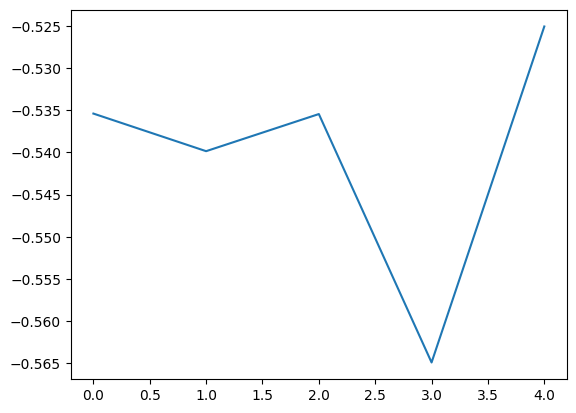

In [49]:
plt.plot(scores['test_score'])

**FINAL RESULT**

    - The best model has been obtained in case of "Grid Search CV + All features" of the Decision Tree.
    - The best set of parameters obtained:
        {'criterion': 'squared_error',
         'max_depth': 10,
         'max_features': 'log2',
         'min_samples_leaf': 2,
         'min_samples_split': 2,
         'splitter': 'best'
         }
         
     - Mean Squared Error training data: 0.428
     - Mean Squared Error test data: 0.411
